# 주문지역 인구특성 시각화(2) - 서울특별시 여성 중심으로


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
raw_pop = pd.read_csv('KGUPOPLTNINFO.csv', header=None)
pop = raw_pop.copy()
pop.head(5)

,0,1,2,3,4,5,6,7
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990


In [3]:
## 컬럼명 설정

In [4]:
pop.columns = ["date", "code", "sido","gu","age","totalpop","malepop","femalepop"]

In [5]:
pop.head(5)

,date,code,sido,gu,age,totalpop,malepop,femalepop
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990


In [6]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157374 entries, 0 to 157373
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       157374 non-null  int64 
 1   code       157374 non-null  int64 
 2   sido       157374 non-null  object
 3   gu         157374 non-null  object
 4   age        157374 non-null  object
 5   totalpop   157374 non-null  int64 
 6   malepop    157374 non-null  int64 
 7   femalepop  157374 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 9.6+ MB


In [7]:
pop['date']
#2018년 1월 ~ 2020년 6월까지

0         201801
1         201802
2         201803
3         201804
4         201805
           ...  
157369    202002
157370    202003
157371    202004
157372    202005
157373    202006
Name: date, Length: 157374, dtype: int64

In [8]:
## 날짜를 연도와 월 컬럼으로 나누기

In [9]:
pop['date'] = pop['date'].astype('string')

In [10]:
year = []
for i in pop['date']:
    year.append(i[0:4])
pop['year']=year

In [11]:
month = []
for i in pop['date']:
    month.append(i[4:6])
pop['month']=month
    

In [12]:
pop

,date,code,sido,gu,age,totalpop,malepop,femalepop,year,month
0,201801,11110,서울특별시,종로구,0-4세,4070,2054,2016,2018,01
1,201802,11110,서울특별시,종로구,0-4세,4049,2049,2000,2018,02
2,201803,11110,서울특별시,종로구,0-4세,4022,2036,1986,2018,03
3,201804,11110,서울특별시,종로구,0-4세,4008,2025,1983,2018,04
4,201805,11110,서울특별시,종로구,0-4세,4007,2017,1990,2018,05
...,...,...,...,...,...,...,...,...,...,...
157369,202002,50130,제주특별자치도,서귀포시,100+,99,11,88,2020,02
157370,202003,50130,제주특별자치도,서귀포시,100+,102,11,91,2020,03
157371,202004,50130,제주특별자치도,서귀포시,100+,101,10,91,2020,04
157372,202005,50130,제주특별자치도,서귀포시,100+,101,10,91,2020,05


In [13]:
pop['year'] = pop['year'].astype('int')
pop['month'] = pop['month'].astype('int')

In [14]:
pop = pop.drop(['date','code'], axis=1)

In [15]:
pop.head(30)

,sido,gu,age,totalpop,malepop,femalepop,year,month
0,서울특별시,종로구,0-4세,4070,2054,2016,2018,1
1,서울특별시,종로구,0-4세,4049,2049,2000,2018,2
2,서울특별시,종로구,0-4세,4022,2036,1986,2018,3
3,서울특별시,종로구,0-4세,4008,2025,1983,2018,4
4,서울특별시,종로구,0-4세,4007,2017,1990,2018,5
5,서울특별시,종로구,0-4세,3979,2014,1965,2018,6
6,서울특별시,종로구,0-4세,3946,1992,1954,2018,7
7,서울특별시,종로구,0-4세,3949,2004,1945,2018,8
8,서울특별시,종로구,0-4세,3930,2002,1928,2018,9
9,서울특별시,종로구,0-4세,3926,1986,1940,2018,10


In [16]:
pop['sido'].unique()
#전국 데이터 있음, 배달 데이터는 서울과 경기도만 있기 때문에 나중에 빼서 살펴보기로!

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [17]:
pop['age'].unique()

array(['0-4세', '5-9세', '10-14세', '15-19세', '20-24세', '25-29세', '30-34세',
       '35-39세', '40-44세', '45-49세', '50-54세', '55-59세', '60-64세',
       '65-69세', '70-74세', '75-79세', '80-84세', '85-89세', '90-94세',
       '95-99세', '100+'], dtype=object)

#### 각 연도의 가장 마지막 월을 뽑은 전국 데이터셋

In [18]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [19]:
#각 연도의 가장 마지막 월을 뽑은 데이터셋
pop_201812 = pop[(pop['year']==2018) & (pop['month']==12)]
pop_201912 = pop[(pop['year']==2019) & (pop['month']==12)]
pop_20206 = pop[(pop['year']==2020) & (pop['month']==6)]

In [20]:
pop_concat = pd.concat([pop_201812, pop_201912, pop_20206])

In [21]:
pop_concat = pop_concat.drop('month', axis=1)
pop_concat

,sido,gu,age,totalpop,malepop,femalepop,year
11,서울특별시,종로구,0-4세,3873,1966,1907,2018
23,서울특별시,종로구,5-9세,4715,2414,2301,2018
35,서울특별시,종로구,10-14세,5316,2708,2608,2018
47,서울특별시,종로구,15-19세,7067,3550,3517,2018
59,서울특별시,종로구,20-24세,11176,5416,5760,2018
...,...,...,...,...,...,...,...
157349,제주특별자치도,서귀포시,80-84세,5098,1888,3210,2020
157355,제주특별자치도,서귀포시,85-89세,2972,803,2169,2020
157361,제주특별자치도,서귀포시,90-94세,876,141,735,2020
157367,제주특별자치도,서귀포시,95-99세,330,38,292,2020


In [22]:
pop_concat_grouped = pop_concat.groupby(['sido','year']).sum().reset_index()

#### 전국 시도별 성별 그래프

In [23]:
#하나의 막대그래프로 그리고 싶어서
#maledf와 femael로 데이터셋 분리하고 각 데이터셋에 sex 변수 추가
#각 sex에 male과 female 값 추가
#다시 하나의 df로 합쳐서 그래프 그릴것임!

maledf = pop_concat_grouped[['sido','year','malepop']]
femaledf = pop_concat_grouped[['sido','year','femalepop']]

In [24]:
maledf.rename(columns = {'malepop' : 'pop'}, inplace = True)
maledf['sex']='male'

C:\Users\1306h\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-24-6be3755c3dc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maledf['sex']='male'


In [25]:
femaledf.rename(columns = {'femalepop' : 'pop'}, inplace = True)
femaledf['sex']='female'

<ipython-input-25-8681d296d7df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  femaledf['sex']='female'


In [26]:
sex_concat = pd.concat([maledf,femaledf])

In [51]:
sex_concat

,sido,year,pop,sex
0,강원도,2018,776456,male
1,강원도,2019,775386,male
2,강원도,2020,774325,male
3,경기도,2018,6577501,male
4,경기도,2019,6659995,male
...,...,...,...,...
46,충청남도,2019,1041771,female
47,충청남도,2020,1038547,female
48,충청북도,2018,790281,female
49,충청북도,2019,789623,female


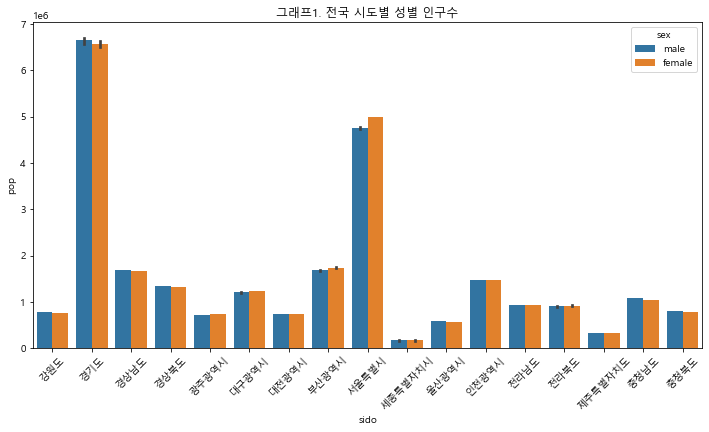

In [27]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='sido', y='pop', hue='sex', data=sex_concat)
plt.xticks(rotation=45)
plt.title('그래프1. 전국 시도별 성별 인구수')

plt.show()

#그래프 해석
#이전에 그렸던 그래프와 같은 의미지만 성별을 비교하기에 가독성이 좋은 그래프이다.
#경기도는 남성이, 서울특별시는 여성이 많다.

#### 서울특별시 구별 연도별 그래프

#### 각 연도의 가장 마지막 월을 뽑은 서울특별시 데이터셋

In [28]:
#서울만 추출
seoul = pop_concat[pop_concat['sido']=='서울특별시']
seoul

,sido,gu,age,totalpop,malepop,femalepop,year
11,서울특별시,종로구,0-4세,3873,1966,1907,2018
23,서울특별시,종로구,5-9세,4715,2414,2301,2018
35,서울특별시,종로구,10-14세,5316,2708,2608,2018
47,서울특별시,종로구,15-19세,7067,3550,3517,2018
59,서울특별시,종로구,20-24세,11176,5416,5760,2018
...,...,...,...,...,...,...,...
128999,서울특별시,강동구,80-84세,6748,2749,3999,2020
129005,서울특별시,강동구,85-89세,3364,977,2387,2020
129011,서울특별시,강동구,90-94세,1455,304,1151,2020
129017,서울특별시,강동구,95-99세,379,80,299,2020


In [29]:
seoul_grouped = seoul.groupby(['gu','year']).sum().reset_index()

In [53]:
seoul_grouped2020

,gu,year,totalpop,malepop,femalepop,femaleratio,maleratio
2,강남구,2020,541233,258753,282480,52.191940,47.808060
5,강동구,2020,457164,225206,231958,50.738466,49.261534
8,강북구,2020,311773,152028,159745,51.237599,48.762401
11,강서구,2020,586936,283697,303239,51.664747,48.335253
14,관악구,2020,499740,250829,248911,49.808100,50.191900
17,광진구,2020,349574,168879,180695,51.690057,48.309943
20,구로구,2020,405075,200098,204977,50.602234,49.397766
23,금천구,2020,232250,117762,114488,49.295156,50.704844
26,노원구,2020,528887,255624,273263,51.667558,48.332442
29,도봉구,2020,329560,160855,168705,51.190982,48.809018


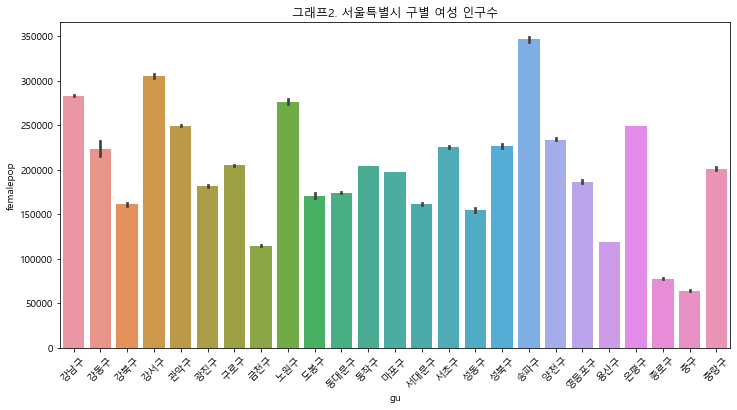

In [30]:
plt.figure(figsize=(12, 6))
g = sns.barplot(x='gu', y='femalepop', data=seoul_grouped)
plt.xticks(rotation=45)
plt.title('그래프2. 서울특별시 구별 여성 인구수')

plt.show()
#그래프 해석
#서울특별시에서 여성이 가장 많은 곳은 송파구, 강서구, 강남구이다.
#각 구별 인구대비 여성 점유율을 계산하여 그래프를 그려보아야겠다.

#### 서울특별시 구별 100% 막대

In [31]:
#각 구별 성별 점유율 변수 추가
seoul_grouped['femaleratio'] = seoul_grouped['femalepop']/seoul_grouped['totalpop']*100
seoul_grouped['maleratio'] = seoul_grouped['malepop']/seoul_grouped['totalpop']*100

In [32]:
df = seoul_grouped[['gu','year','femaleratio','maleratio']]

In [33]:
df = df[df['year']==2020]
df = df.drop('year', axis=1)

In [50]:
df

,gu,femaleratio,maleratio
2,강남구,52.191940,47.808060
5,강동구,50.738466,49.261534
8,강북구,51.237599,48.762401
11,강서구,51.664747,48.335253
14,관악구,49.808100,50.191900
17,광진구,51.690057,48.309943
20,구로구,50.602234,49.397766
23,금천구,49.295156,50.704844
26,노원구,51.667558,48.332442
29,도봉구,51.190982,48.809018


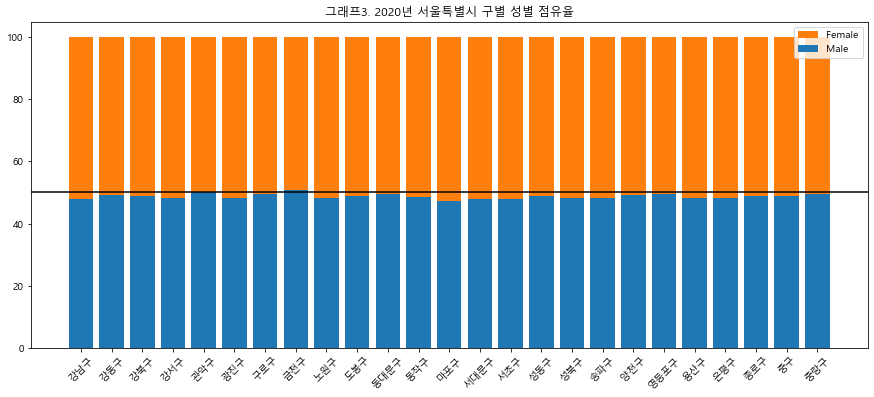

In [49]:
upper = df['femaleratio']
bottom = df['maleratio']

plt.figure(figsize=(15, 6))
p1 = plt.bar(df['gu'], bottom)
p2 = plt.bar(df['gu'], upper,
             bottom=bottom)

plt.legend((p2[0], p1[0]), ('Female', 'Male'))
plt.axhline(y=50, color='black', linestyle='-')
plt.xticks(rotation=45)
plt.title('그래프3. 2020년 서울특별시 구별 성별 점유율')
plt.show()

#그래프 해석
#이전에 그렸던 그래프와 같은 의미지만 성별을 비교하기에 가독성이 좋은 그래프이다.
#관악구와 금천구만 남성이 50%를 넘긴다.
#나머지 구에서는 여성이 아주 조금더 많다.

#### 2020년 여성 인구가 많은 구 top3  & 여성 점유율이 높은 구 top3 

In [35]:
seoul_grouped2020 = seoul_grouped[seoul_grouped['year']==2020]

In [36]:
#2020년 여성 인구 top 3
seoul_grouped2020.sort_values('femalepop', ascending=False).head(3)

,gu,year,totalpop,malepop,femalepop,femaleratio,maleratio
53,송파구,2020,671512,324317,347195,51.703469,48.296531
11,강서구,2020,586936,283697,303239,51.664747,48.335253
2,강남구,2020,541233,258753,282480,52.191940,47.808060


In [37]:
#2020년 여성 점유율 top 3
seoul_grouped2020.sort_values('femaleratio', ascending=False).head(3)

,gu,year,totalpop,malepop,femalepop,femaleratio,maleratio
38,마포구,2020,374390,176664,197726,52.812842,47.187158
44,서초구,2020,428919,205037,223882,52.196802,47.803198
2,강남구,2020,541233,258753,282480,52.191940,47.808060


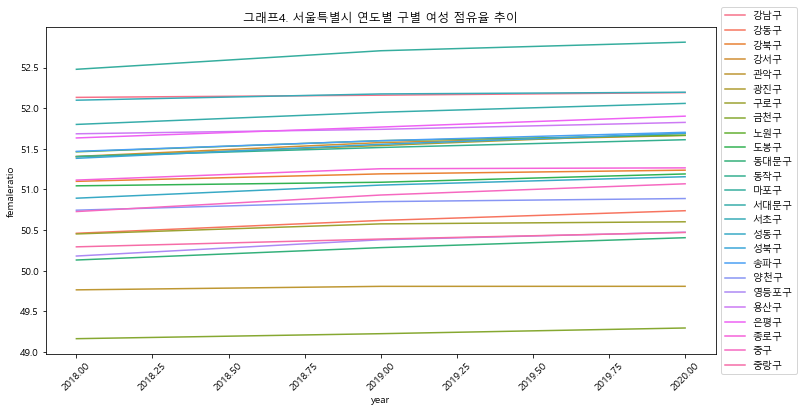

In [38]:
plt.figure(figsize=(12, 6))
g = sns.lineplot(x='year', y='femaleratio', hue='gu', data=seoul_grouped)
plt.xticks(rotation=45)
plt.title('그래프4. 서울특별시 연도별 구별 여성 점유율 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#가장 높고, 변화가 보이는 곳이 마포구이다.

#### 송파구, 강서구, 마포구, 서초구, 강남구 순으로 살펴보고자 함

#### 1. 송파구(여성 인구 top1) 여성 연령별

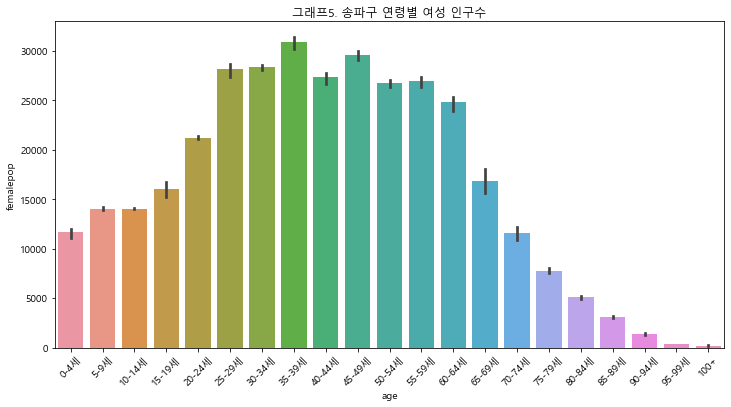

In [39]:
songpa = seoul[seoul['gu']=='송파구']

plt.figure(figsize=(12, 6))
g = sns.barplot(x='age', y='femalepop', data=songpa)
plt.xticks(rotation=45)
plt.title('그래프5. 송파구 연령별 여성 인구수')

plt.show()

#그래프 해석
#35세~39세가 가장 높다.
#중년층이 많다.

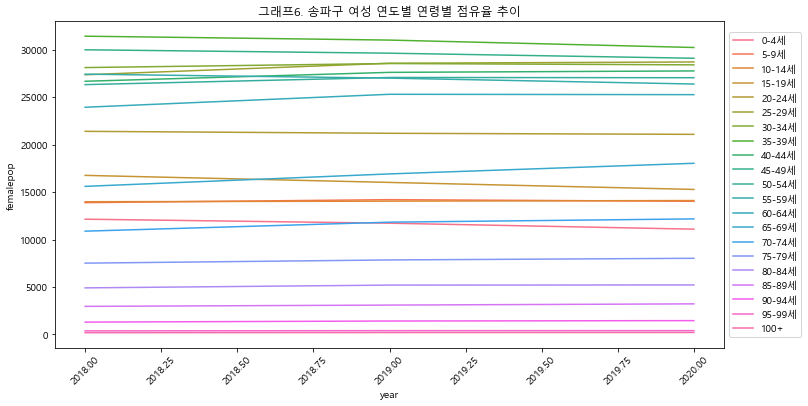

In [40]:
plt.figure(figsize=(12, 6))
g = sns.lineplot(x='year', y='femalepop', hue='age', data=songpa)
plt.xticks(rotation=45)
plt.title('그래프6. 송파구 여성 연도별 연령별 점유율 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#35세~39세가 가장 높지만, 점점 감소하는 추세이다.
#25세~29세와 30세~34세가 약간 증가하고 있다. 
#송파구 여성을 타겟으로 한다면, 30대를 위한 서비스를 추천한다.

#### 2. 강서구(여성 인구 top2) 여성 연령별

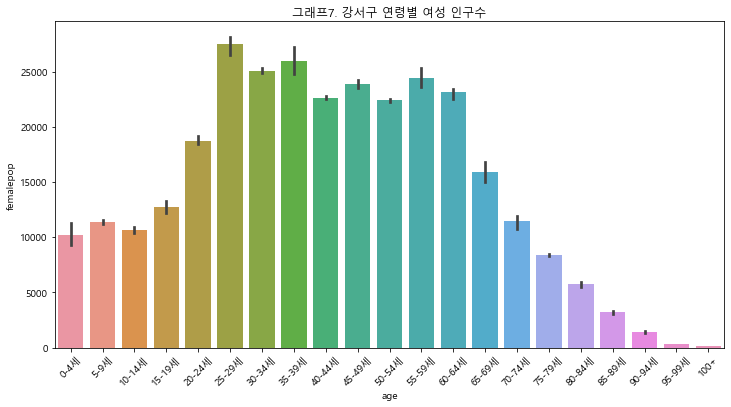

In [41]:
gangseo = seoul[seoul['gu']=='강서구']

plt.figure(figsize=(12, 6))
g = sns.barplot(x='age', y='femalepop', data=gangseo)
plt.xticks(rotation=45)
plt.title('그래프7. 강서구 연령별 여성 인구수')

plt.show()

#그래프 해석
#25세~29세가 가장 높다.
#청년층이 많다.

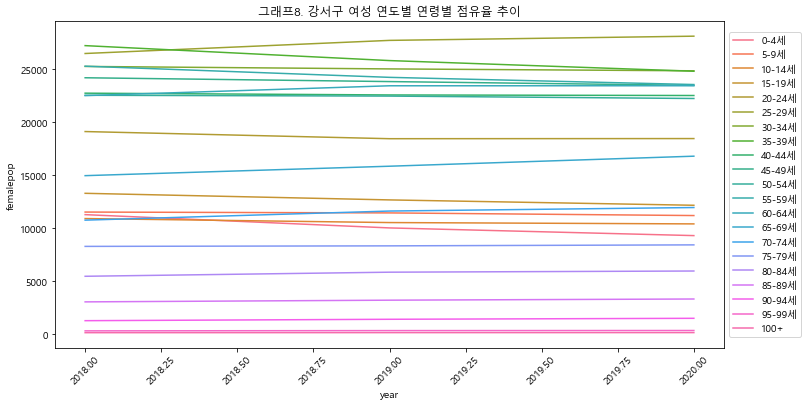

In [42]:
plt.figure(figsize=(12, 6))
g = sns.lineplot(x='year', y='femalepop', hue='age', data=gangseo)
plt.xticks(rotation=45)
plt.title('그래프8. 강서구 여성 연도별 연령별 점유율 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#25세~29세가 가장 높기도 하고, 계속 증가하는 추세이다.
#강서구 여성을 타겟으로 한다면, 20대를 위한 서비스를 추천한다.

#### 3. 마포구(여성 점유율 top1) 여성 연령별

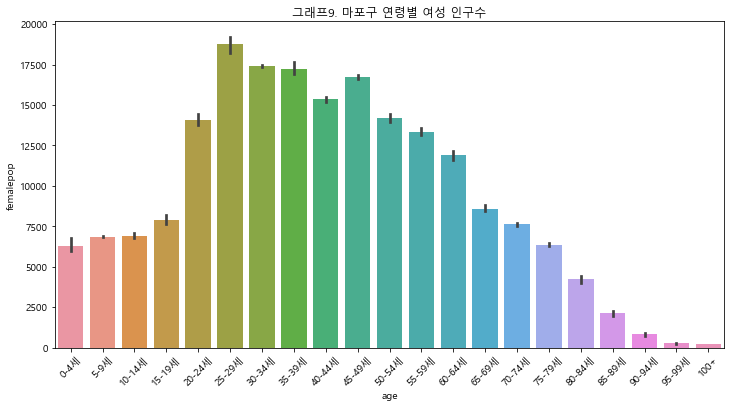

In [43]:
mapo = seoul[seoul['gu']=='마포구']

plt.figure(figsize=(12, 6))
g = sns.barplot(x='age', y='femalepop', data=mapo)
plt.xticks(rotation=45)
plt.title('그래프9. 마포구 연령별 여성 인구수')

plt.show()

#그래프 해석
#25세~29세가 가장 높다.
#청년층이 많다.

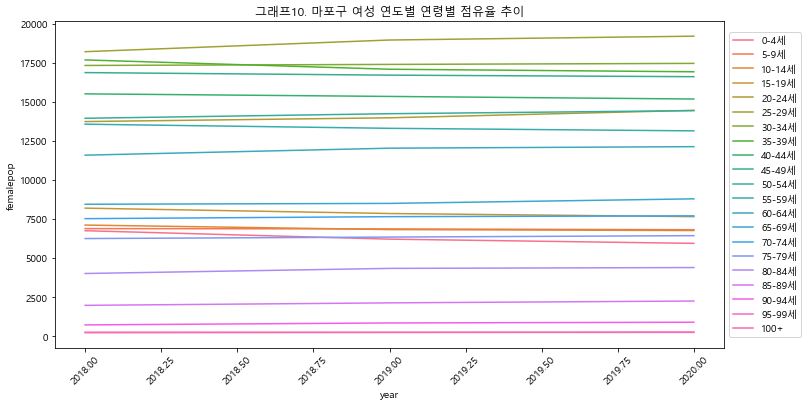

In [44]:
plt.figure(figsize=(12, 6))
g = sns.lineplot(x='year', y='femalepop', hue='age', data=mapo)
plt.xticks(rotation=45)
plt.title('그래프10. 마포구 여성 연도별 연령별 점유율 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#25세~29세가 가장 높기도 하고, 계속 증가하는 추세이다.
#마포구 여성을 타겟으로 한다면, 20대를 위한 서비스를 추천한다.

#### 4.서초구(여성 점유율 top2)  여성 연령별

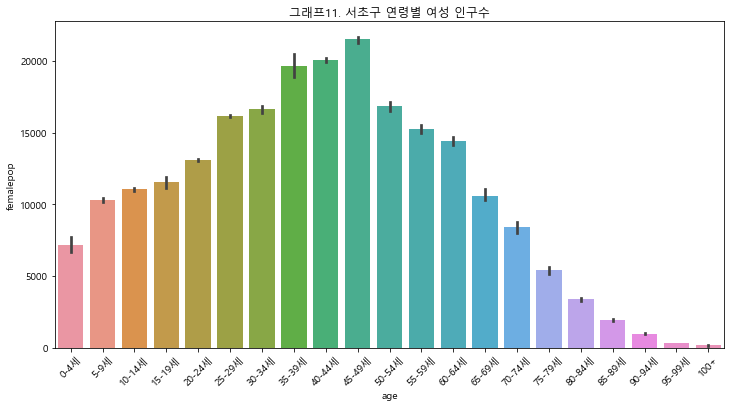

In [45]:
seocho = seoul[seoul['gu']=='서초구']

plt.figure(figsize=(12, 6))
g = sns.barplot(x='age', y='femalepop', data=seocho)
plt.xticks(rotation=45)
plt.title('그래프11. 서초구 연령별 여성 인구수')

plt.show()

#그래프 해석
#45세~49세가 가장 높다.
#여성 중장년층이 많다.

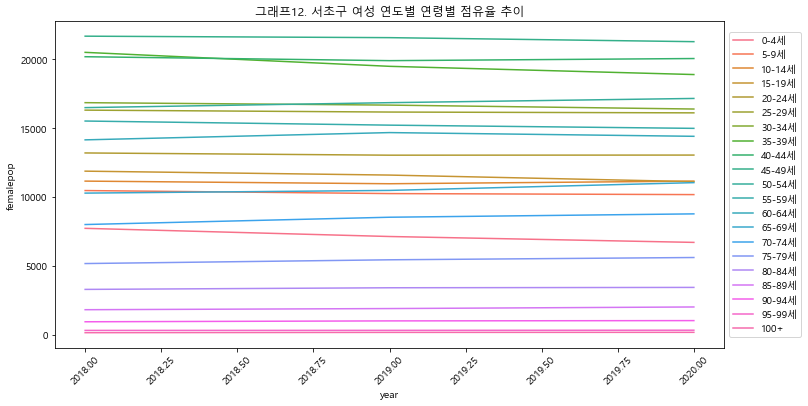

In [46]:
plt.figure(figsize=(12, 6))
g = sns.lineplot(x='year', y='femalepop', hue='age', data=seocho)
plt.xticks(rotation=45)
plt.title('그래프12. 서초구 여성 연도별 연령별 점유율 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#45세~49세가 가장 높긴하지만 약간 감소하는 추세이다.
#40세~44세는 두번째로 높으며, 아주 약간 증가하는 추세이다.
#서초구 여성을 타겟으로 한다면, 40대를 위한 서비스를 추천한다.

#### 5. 강남구(여성 인구 top3 & 여성 점유율 top3)

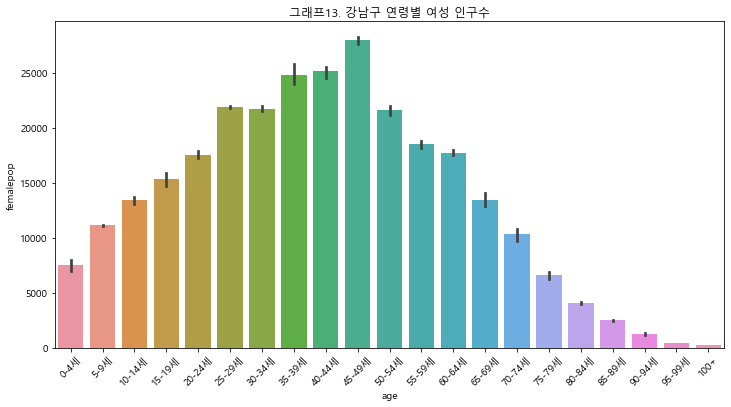

In [47]:
gangnam = seoul[seoul['gu']=='강남구']

plt.figure(figsize=(12, 6))
g = sns.barplot(x='age', y='femalepop', data=gangnam)
plt.xticks(rotation=45)
plt.title('그래프13. 강남구 연령별 여성 인구수')

plt.show()

#그래프 해석
#45세~49세가 가장 높다.
#여성 중장년층이 많다.

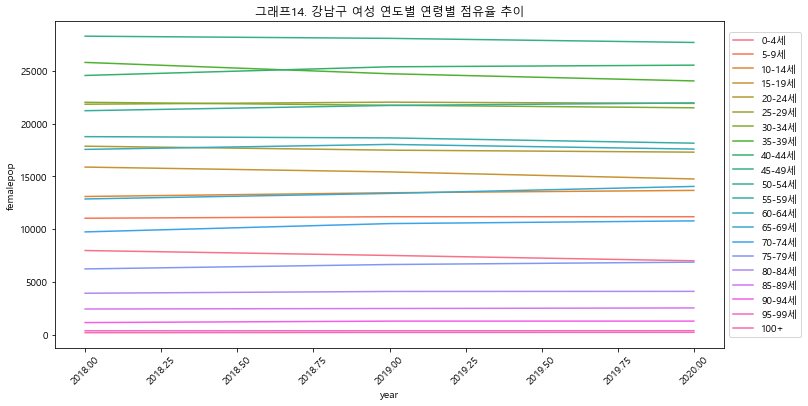

In [48]:
plt.figure(figsize=(12, 6))
g = sns.lineplot(x='year', y='femalepop', hue='age', data=gangnam)
plt.xticks(rotation=45)
plt.title('그래프14. 강남구 여성 연도별 연령별 점유율 추이')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#그래프 해석
#45세~49세가 가장 높지만 약간 감소하는 추세이다.
#40세~44세가 두번째로 높으면서, 증가하는 추세이다.
#강남구 여성을 타깃으로 한다면, 40대 위한 서비스를 추천한다.

### 결론
- 서울특별시 & 여성으로만 살펴봄


- 여성인구 top3: 송파구, 강서구, 강남구 
- 여성인구 점유율 top3:마포구, 서초구, 강남구



- 타깃 설정
    - 20대: 마포구, 강서구
    - 30대: 송파구
    - 40대: 서초구, 강남구